# Imports

In [86]:
import numpy as np
import pandas as pd
import itertools

import gzip
import pickle


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

In [2]:
df = pd.read_csv('5k_Datasets/5k_tweets_lda_10.csv', index_col=0)
df.shape

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(575949, 32)

In [3]:
with gzip.open('Datasets/features_df.pkl', 'rb') as handle:
    features_df = pickle.load(handle)  
features_df.shape

(575949, 3725)

# Train Test Split

In [8]:
# Fucntion to split into train and test data
def tt_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)
    return X_train, X_test, y_train, y_test

# Split into train and test data
X_train, X_test, y_train, y_test = tt_split(features_df, df['sentiment'])

X_train.shape, X_test.shape

((431961, 3725), (143988, 3725))

# MinMax Scaler

In [11]:
# MinMax Scaler
mm_scaler = MinMaxScaler()
X_train_mm_scl = mm_scaler.fit_transform(X_train)
X_test_mm_scl = mm_scaler.transform(X_test)

# Standard Scaler

In [17]:
# Standard Scaler
std_scaler = StandardScaler()
X_train_std_scl = std_scaler.fit_transform(X_train)
X_test_std_scl = std_scaler.transform(X_test)

# Bernoulli Naive Bayes

In [12]:
# Function to fit bernoulli naive bayes model
def bnb(X_train, y_train):
    bnb = BernoulliNB()
    bnb_fit = bnb.fit(X_train, y_train)
    return bnb_fit

In [13]:
# Fit bernoulli naive bayes model on train data, predict on minmax scaler test data
bnb_fit_mm_scl = bnb(X_train_mm_scl, y_train)
bnb_preds_mm_scl = bnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(bnb_preds_mm_scl, y_test), f1_score(bnb_preds_mm_scl, y_test, average='weighted')

(0.6962663555296275, 0.6938904652543706)

In [18]:
# Fit bernoulli naive bayes model on train data, predict on standard scaler test data
bnb_fit_std_scl = bnb(X_train_std_scl, y_train)
bnb_preds_std_scl = bnb_fit_std_scl.predict(X_test_std_scl)

accuracy_score(bnb_preds_std_scl, y_test), f1_score(bnb_preds_std_scl, y_test, average='weighted')

(0.7007250604217018, 0.698552621939297)

In [57]:
# Feature count
bnb_fit_std_scl.feature_count_

array([[ 9643., 16881.,  9610., ...,   603.,   122.,   201.],
       [ 4336.,  6795.,  4322., ...,   157.,    22.,    52.],
       [11446., 17503., 10834., ...,   475.,    99.,   185.]])

In [68]:
# Top 10 most important features per class
pos_class_prob_sorted = bnb_fit_std_scl.feature_log_prob_[0, :].argsort()
neu_class_prob_sorted = bnb_fit_std_scl.feature_log_prob_[1, :].argsort()
neg_class_prob_sorted = bnb_fit_std_scl.feature_log_prob_[2, :].argsort()

print(np.take(features_df.columns, pos_class_prob_sorted[:10]))
print(np.take(features_df.columns, neu_class_prob_sorted[:10]))
print(np.take(features_df.columns, neg_class_prob_sorted[:10]))

Index(['#wholesale', 'okhand', '#sale', 'smilingfacewith3',
       'smilingfacewithheart', 'faceblowingakiss', '#love', '#safe',
       'twohearts', 'blueheart'],
      dtype='object')
Index(['incompetence', 'smilingfacewithheart', 'smilingfacewith3', 'heartsuit',
       'purpleheart', 'threatened', 'upset', 'discarded', 'noble', 'okhand'],
      dtype='object')
Index(['iniran', 'assault', 'suicide', 'thief', 'germany's', 'incompetence',
       'violent', 'gross', '#fight', 'declares'],
      dtype='object')


# Multinomial Naive Bayes

In [14]:
# Function to fit multinomial naive bayes model
def mnb(X_train, y_train):
    mnb = MultinomialNB()
    mnb_fit = mnb.fit(X_train, y_train)
    return mnb_fit

In [15]:
# Fit multinomial naive bayes model on train data, predict on minmax scaler test data
mnb_fit_mm_scl = mnb(X_train_mm_scl, y_train)
mnb_preds_mm_scl = mnb_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(mnb_preds_mm_scl, y_test), f1_score(mnb_preds_mm_scl, y_test, average='weighted')

(0.648366530544212, 0.6560903029607621)

# Decision Tree

In [25]:
# Function to fit decision tree model
def dt(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt_fit = dt.fit(X_train, y_train)
    return dt_fit

In [26]:
# Fit decision tree model on train data, predict on minmax scaler test data
dt_fit_mm_scl = dt(X_train_mm_scl, y_train)
dt_preds_mm_scl = dt_fit_mm_scl.predict(X_test_mm_scl)

accuracy_score(dt_preds_mm_scl, y_test), f1_score(dt_preds_mm_scl, y_test, average='weighted')

(0.723782537433675, 0.7237418687722337)

In [27]:
# Fit decision tree on train data, predict on standard scaler test data
dt_fit_std_scl = dt(X_train_std_scl, y_train)
dt_preds_std_scl = dt_fit_std_scl.predict(X_test_std_scl)

accuracy_score(dt_preds_std_scl, y_test), f1_score(dt_preds_std_scl, y_test, average='weighted')

(0.7228171792093786, 0.7227790464378497)

In [59]:
# Feature importances
dt_fit_std_scl.feature_importances_

array([1.37984427e-02, 7.07843347e-03, 6.19432068e-03, ...,
       1.73897035e-04, 3.40212838e-05, 9.40662773e-05])

In [73]:
features_dict = dict(zip(features_df.columns, dt_fit_mm_scl.feature_importances_))
sorted_d = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_d

[('subjectivity_score', 0.06111831308232892),
 ('nlikes', 0.01402649295835318),
 ('protect', 0.013184184251441364),
 ('help', 0.012865803628373692),
 ('infected', 0.011508287105684818),
 ('safe', 0.009374088894935299),
 ('please', 0.00832027302188848),
 ('death', 0.008313647504325852),
 ('hand', 0.007588242417386953),
 ('nreplies', 0.007010932702317728)]

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000


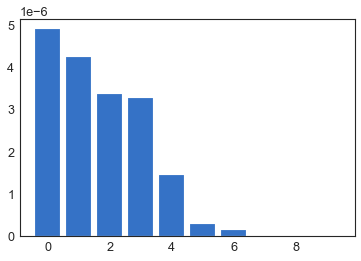

In [75]:
# Top 10 most important features
dt_importance = sorted(dt_fit_mm_scl.feature_importances_, reverse=True)[-10:]

for i,v in enumerate(dt_importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(dt_importance))], dt_importance)
plt.show()

In [81]:
dt_features = dict(zip(features_df.columns, dt_fit_mm_scl.feature_importances_))
dt_features = dict(sorted(dt_features.items(), key=lambda x: x[1], reverse=True)[:10])
dt_features

{'subjectivity_score': 0.06111831308232892,
 'nlikes': 0.01402649295835318,
 'protect': 0.013184184251441364,
 'help': 0.012865803628373692,
 'infected': 0.011508287105684818,
 'safe': 0.009374088894935299,
 'please': 0.00832027302188848,
 'death': 0.008313647504325852,
 'hand': 0.007588242417386953,
 'nreplies': 0.007010932702317728}

In [84]:
dt_features.keys()

dict_keys(['subjectivity_score', 'nlikes', 'protect', 'help', 'infected', 'safe', 'please', 'death', 'hand', 'nreplies'])

<BarContainer object of 10 artists>

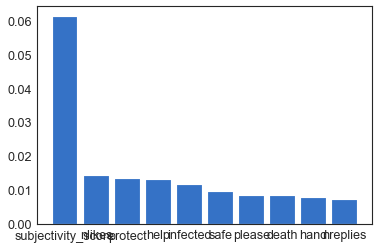

In [87]:
plt.bar(dt_features.keys(), dt_features.values())

# Confusion Matrix

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, color='white')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, color='white', rotation=45)
    plt.yticks(tick_marks, classes, color='white')
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=15,
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label', color='white')
    plt.xlabel('Predicted Label', color='white')

Normalized confusion matrix
[[0.70889576 0.08239822 0.20870602]
 [0.14535307 0.72822131 0.12642562]
 [0.19625418 0.06832776 0.73541806]]


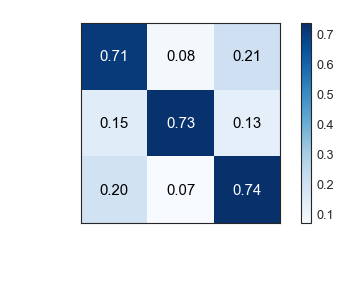

In [53]:
cm_dt_mm_scl = confusion_matrix(y_test, dt_preds_mm_scl)
classes = ['Negative', 'Neutral', 'Positive']
plot_confusion_matrix(cm_dt_mm_scl, classes, normalize=True,
                      title='Decision Tree Confusion Matrix', cmap=plt.cm.Blues)

In [49]:
from io import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(dt_fit_mm_scl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['negative','neutral', 'positive'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_twee.png')
Image(graph.create_png())